### Ejercicio 1
---

### Ejercicio 2
 Apoyándose en la sección de información. Separa en fragmentos un texto extenso extraído
 y vectoriza cada fragmento con alguno de los modelos de embedding vistos en clases.
Luego realiza un análisis de similitud de texto ingresando varias frases a buscar
semánticamente, compare distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esa técnica se ajusta para este tipo de búsquedas.
OPCIONAL: Visualizar en 3D aplicando PCA o t-SNE la ubicación de los fragmentos y la
query ingresada vectorizada en el espacio. Realizar una observación sobre la visualización.


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Query,Top Cosine,Top Euclidean,Top Manhattan
0,Cómo se construyen edificios,"[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ..."
1,Qué pasa cuando termina la partida,"[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ..."
2,Qué significa cada recurso,"[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ..."
3,Qué pasa si no puedo construir un edificio,"[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ..."
4,Cuántos recursos hay en el juego,"[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ...","[555 N El Camino Real #A393, \nSan Clemente, ..."


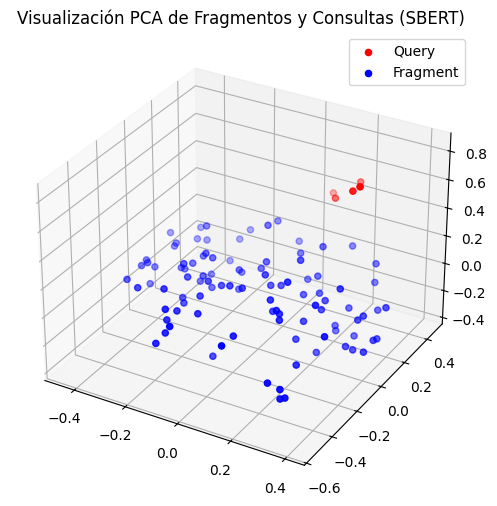

In [6]:
# Instalar librerías necesarias
!pip install -q sentence-transformers scikit-learn matplotlib pandas

# Importar librerías
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.decomposition import PCA

with open("../datos/informacion/manual.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Separar el texto en oraciones
import re
sentences = re.split(r'(?<=[.!?]) +', text)
sentences = [s.strip() for s in sentences if len(s.strip()) > 20]

# Cargar modelo SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# Vectorizar fragmentos
sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

# Consultas a buscar semánticamente
queries = [
    "Cómo se construyen edificios",
    "Qué pasa cuando termina la partida",
    "Qué significa cada recurso",
    "Qué pasa si no puedo construir un edificio",
    "Cuántos recursos hay en el juego"
]
query_embeddings = model.encode(queries, convert_to_tensor=True)

# Similitud semántica
cos_sim = util.cos_sim(query_embeddings, sentence_embeddings).cpu().numpy()
euc_dist = euclidean_distances(query_embeddings, sentence_embeddings.cpu().numpy())
man_dist = manhattan_distances(query_embeddings, sentence_embeddings.cpu().numpy())

# Mostrar resultados por métrica
results = []
for i, query in enumerate(queries):
    top_cos = np.argsort(-cos_sim[i])[:3]
    top_euc = np.argsort(euc_dist[i])[:3]
    top_man = np.argsort(man_dist[i])[:3]
    results.append({
        "Query": query,
        "Top Cosine": [sentences[j] for j in top_cos],
        "Top Euclidean": [sentences[j] for j in top_euc],
        "Top Manhattan": [sentences[j] for j in top_man]
    })

df = pd.DataFrame(results)
display(df)

# Visualización en 3D (solo primeros 100 fragmentos por simplicidad)
from mpl_toolkits.mplot3d import Axes3D

reduced = PCA(n_components=3).fit_transform(
    np.vstack((query_embeddings.cpu(), sentence_embeddings.cpu().numpy()[:100]))
)
labels = ["Query"]*len(queries) + ["Fragment"]*100
df_plot = pd.DataFrame(reduced, columns=["x", "y", "z"])
df_plot["label"] = labels

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
colors = {"Query": "red", "Fragment": "blue"}

for label in df_plot["label"].unique():
    subset = df_plot[df_plot["label"] == label]
    ax.scatter(subset["x"], subset["y"], subset["z"], label=label, c=colors[label])

ax.set_title("Visualización PCA de Fragmentos y Consultas (SBERT)")
ax.legend()
plt.show()


### Ejercicio 3

Apoyándose nuevamente en la sección de información. Recoge un texto extenso extraído,
divídelos en fragmentos, luego realiza extracciones de sustantivos (POS) y categoriza estos
sustantivos (NER), a continuación realiza una búsqueda de similitud filtrando por
sustantivos, compara las distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esta técnica se ajusta para este tipo de búsquedas.


In [7]:
# Paso 1: cargar el texto manualmente
with open("../datos/informacion/review_externa.txt", "r", encoding="utf-8") as f:
    texto = f.read()

# Paso 2: fragmentar el texto por oraciones de forma básica
oraciones = [frase.strip() for frase in texto.split('.') if len(frase.strip()) > 20]

# Mostrar ejemplo
for i, oracion in enumerate(oraciones[:5]):
    print(f"{i+1}: {oracion}")

print(f"{len(oraciones)}")


1: Título:Reseña: Tiny TownsEres el alcalde de una pequeña ciudad en el bosque, donde pacificas criaturas han creado una civilización escondida de los depredadores
2: En esta diminuta tierra los recursos son escasos, así que tomas lo que puedes y nunca dices no a los materiales de construcción
3: Planea con inteligencia para construir una ciudad prosperar y no permitas que se llene de recursos inútiles
4: ¡Quien construye la ciudad más prospera será el ganador!
Así se nos presenta Tiny Towns, un diseño de Peter McPherson, siendo este su primer título publicado
5: El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés
159


In [16]:
# Todas las librerías para POS y NER
!pip install nltk
import nltk
nltk.data.path.append("../nltk_data")
nltk.download('averaged_perceptron_tagger', download_dir='../nltk_data')
nltk.download('averaged_perceptron_tagger_eng', download_dir='../nltk_data')
nltk.download('maxent_ne_chunker', download_dir='../nltk_data')
nltk.download('maxent_ne_chunker_tab', download_dir='../nltk_data')
nltk.download('words', download_dir='../nltk_data')



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ../nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     ../nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to ../nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     ../nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to ../nltk_data...
[nltk_data] Error downloading 'words' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk

False

In [17]:
from nltk import pos_tag

# Extraer sustantivos de cada oración (usando split básico en lugar de word_tokenize)
sustantivos_por_oracion = []

for oracion in oraciones:
    tokens = oracion.split()  # tokenización básica
    tags = pos_tag(tokens)
    sustantivos = [palabra for palabra, etiqueta in tags if etiqueta.startswith('NN')]
    sustantivos_por_oracion.append(sustantivos)

# Mostrar los sustantivos de las primeras 3 oraciones
for i in range(3):
    print(f"{i+1}: {sustantivos_por_oracion[i]}")


1: ['Título:Reseña:', 'Tiny', 'TownsEres', 'alcalde', 'pequeña', 'ciudad', 'bosque,', 'donde', 'pacificas', 'criaturas', 'civilización', 'escondida', 'depredadores']
2: ['En', 'esta', 'diminuta', 'tierra', 'los', 'son', 'escasos,', 'así', 'que', 'tomas', 'lo', 'que', 'puedes', 'dices', 'construcción']
3: ['Planea', 'con', 'inteligencia', 'para', 'construir', 'ciudad', 'prosperar', 'permitas', 'que', 'llene', 'recursos', 'inútiles']


In [ ]:
#### está mal esta celda porque no usó Spacy multilingual y detecta mal el idioma

nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk

# Extraer entidades nombradas por oración
entidades_por_oracion = []

for oracion in oraciones:
    tokens = oracion.split()
    tagged = pos_tag(tokens, lang='eng')
    entidades_chunk = ne_chunk(tagged, binary=False)  # binary=False para obtener etiquetas específicas
    entidades = []

    for subtree in entidades_chunk:
        if hasattr(subtree, 'label'):
            entidad = " ".join([token for token, pos in subtree.leaves()])
            etiqueta = subtree.label()
            entidades.append((entidad, etiqueta))

    entidades_por_oracion.append(entidades)

# Mostrar entidades de las primeras 3 oraciones
for i in range(3):
    print(f"{i+1}: {entidades_por_oracion[i]}")


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


1: []
2: [('En', 'GPE')]
3: [('Planea', 'GPE')]


In [19]:
# Instalar el modelo multilingüe de spaCy
!pip install -q spacy
!python -m spacy download es_core_news_md

# Importar y cargar el modelo en español
import spacy
nlp = spacy.load("es_core_news_md")

# Aplicar NER a cada oración
entidades_spacy = []

for oracion in oraciones:
    doc = nlp(oracion)
    entidades = [(ent.text, ent.label_) for ent in doc.ents]
    entidades_spacy.append(entidades)

# Mostrar entidades de las primeras 3 oraciones
for i in range(3):
    print(f"{i+1}: {entidades_spacy[i]}")



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     --------------------------------------- 0.0/42.3 MB 640.0 kB/s eta 0:01:07
     --------------------------------------- 0.1/42.3 MB 812.7 kB/s eta 0:00:52
     --------------------------------------- 0.1/42.3 MB 777.7 kB/s eta 0:00:55
     --------------------------------------- 0.2/42.3 MB 913.1 kB/s eta 0:00:47
     ---------------------------------------- 0.2/42.3 MB 1.2 MB/s eta 0:00:36
     --------------------------------------- 0.3/42.3 MB 983.0 kB/s eta 0:00:43
     ---------------------------------------- 0.4/42.3 MB 1.3 MB/s eta 0:00:32
      --------------------------------------- 0.6/42.3 MB 1.7 MB/s eta 0:00:26
      --------------------------------------- 0.6/42.3 MB 1.6 MB/s eta 0:00:26
      --------------------------------------- 0.9/42.3 MB 2.0 MB/s eta 0:00:21
     - -------------------------------------- 1.3/42.3 MB 2.6 MB/s eta 0:00:16
     - -------------------------------------- 1.4/42.3

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import numpy as np

# Convertir la lista de sustantivos por oración en strings
sustantivos_texto = [" ".join(sustantivos) for sustantivos in sustantivos_por_oracion]

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sustantivos_texto)

# Elegimos una oración ejemplo (por ejemplo la primera) para comparar con las demás
idx_consulta = 0  # podés cambiar este índice
consulta_vector = tfidf_matrix[idx_consulta]

# Cálculo de distancias
cos_sim = cosine_similarity(consulta_vector, tfidf_matrix)[0]
euc_dist = euclidean_distances(consulta_vector, tfidf_matrix)[0]
man_dist = manhattan_distances(consulta_vector, tfidf_matrix)[0]

# Mostrar las 3 oraciones más similares (coseno → mayor es mejor)
top_cos = np.argsort(-cos_sim)[1:4]
print("\n🔹 Top 3 oraciones similares por COSENO:")
for i in top_cos:
    print(f"- {i}: {oraciones[i]}")

# Mostrar las 3 oraciones más cercanas (euclídea → menor es mejor)
top_euc = np.argsort(euc_dist)[1:4]
print("\n🔹 Top 3 oraciones similares por EUCLÍDEA:")
for i in top_euc:
    print(f"- {i}: {oraciones[i]}")

# Mostrar las 3 oraciones más cercanas (manhattan → menor es mejor)
top_man = np.argsort(man_dist)[1:4]
print("\n🔹 Top 3 oraciones similares por MANHATTAN:")
for i in top_man:
    print(f"- {i}: {oraciones[i]}")



🔹 Top 3 oraciones similares por COSENO:
- 68: Se usa el mazo de alcalde
- 93: Nos hemos convertido en alcaldes de una pequeña ciudad en la que las criaturas viven en paz, con el único objetivo de prosperar y llevar a su urbe un paso más allá para envidia de los municipios cercanos
- 3: ¡Quien construye la ciudad más prospera será el ganador!
Así se nos presenta Tiny Towns, un diseño de Peter McPherson, siendo este su primer título publicado

🔹 Top 3 oraciones similares por EUCLÍDEA:
- 68: Se usa el mazo de alcalde
- 93: Nos hemos convertido en alcaldes de una pequeña ciudad en la que las criaturas viven en paz, con el único objetivo de prosperar y llevar a su urbe un paso más allá para envidia de los municipios cercanos
- 3: ¡Quien construye la ciudad más prospera será el ganador!
Así se nos presenta Tiny Towns, un diseño de Peter McPherson, siendo este su primer título publicado

🔹 Top 3 oraciones similares por MANHATTAN:
- 71: El final de la partida es el habitual
- 36: Con esto ten

C:\Users\marya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\marya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

### Ejercicio 4
Mediante detección de idioma, separar los archivos en distintos lenguajes y guardar esa
información en un dataframe.


In [21]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
      ------------------------------------ 20.5/981.5 kB 640.0 kB/s eta 0:00:02
     -- ---------------------------------- 61.4/981.5 kB 656.4 kB/s eta 0:00:02
     --------- ---------------------------- 235.5/981.5 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993364 sha256=4941380d7356766d4bc08b3708f30bbf1233dd0a096e5d8d7c15ad382f527122
  Stored in directory: c:\users\marya\


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
import os
import pandas as pd
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Para resultados consistentes

In [23]:
carpeta = '../datos/informacion'  # Reemplaza con la ruta correcta

In [24]:
datos = []

for archivo in os.listdir(carpeta):
    if archivo.endswith('.txt'):
        ruta_archivo = os.path.join(carpeta, archivo)
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            contenido = f.read()
            try:
                idioma = detect(contenido)
            except:
                idioma = 'desconocido'
            datos.append({'archivo': archivo, 'idioma': idioma})

In [25]:
df_idiomas = pd.DataFrame(datos)
print(df_idiomas)

              archivo idioma
0          manual.txt     en
1      review_bgg.txt     es
2  review_externa.txt     es
3          video1.txt     nl
4          video2.txt     en
5          video3.txt     en
6          video4.txt     es
